<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Directories" data-toc-modified-id="Directories-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Directories</a></span></li><li><span><a href="#Part-1:-Filters" data-toc-modified-id="Part-1:-Filters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 1: Filters</a></span></li><li><span><a href="#Part-1:-SED-Plotting" data-toc-modified-id="Part-1:-SED-Plotting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Part 1: SED Plotting</a></span></li><li><span><a href="#Calculate-u---g" data-toc-modified-id="Calculate-u---g-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculate u - g</a></span></li><li><span><a href="#Steps:" data-toc-modified-id="Steps:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Steps:</a></span></li><li><span><a href="#Part-2:-SED-Colors" data-toc-modified-id="Part-2:-SED-Colors-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Part 2: SED Colors</a></span></li><li><span><a href="#Part-3:-Redshift" data-toc-modified-id="Part-3:-Redshift-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Part 3: Redshift</a></span></li></ul></div>

* Kaimi Kahihikolo
* ASTR 301 Assignment #1
* Updated: 1 February 2017

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn-bright')
#plt.style.use('dark_background')
#plt.style.use('seaborn-darkgrid')


from pylab import rcParams

import numpy as np
import os

cmap = ["red", "purple", "orange", "cyan"]

## Directories

In [2]:
main_dir = "/Users/kaimibk/Documents/ASTR_301/A1/"
SED_dir = main_dir+"Galaxy SEDs and Filter curves/GalaxySEDs/"
Filter_dir = main_dir+"Galaxy SEDs and Filter curves/FilterCurves/"
out_dir = main_dir+"output/"

## Part 1: Filters

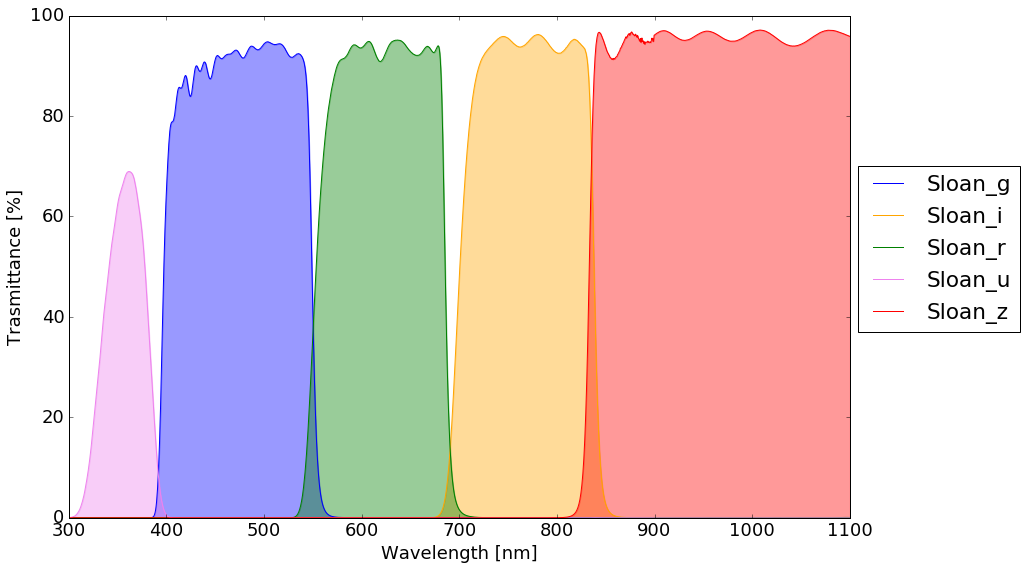

In [6]:
plt.clf()
    
colors = ("blue","orange", "g", "violet", "red")

i = 0
for filename in os.listdir(Filter_dir):
    
    if filename.endswith(".txt"):
        
        label = filename[0:-4]
        X,Y = np.genfromtxt(Filter_dir+filename, unpack=True)
        plt.plot(X, Y, label=label, color=colors[i])
        plt.fill_between(X, np.zeros(len(X)), Y, alpha=0.4, color=colors[i])

        i += 1
rcParams['figure.figsize'] = 14, 9
rcParams.update({'font.size': 18})
        
plt.legend(bbox_to_anchor=(1.01, 0.7), loc=2, borderaxespad=0.)


plt.xlim(300,1100)
plt.xlabel("Wavelength [nm]")

plt.ylim(0, 100)
plt.ylabel("Trasmittance [%]")

#plt.grid()
plt.savefig(out_dir+"filters.png", bbox_inches="tight")
plt.show()


## Part 1: SED Plotting

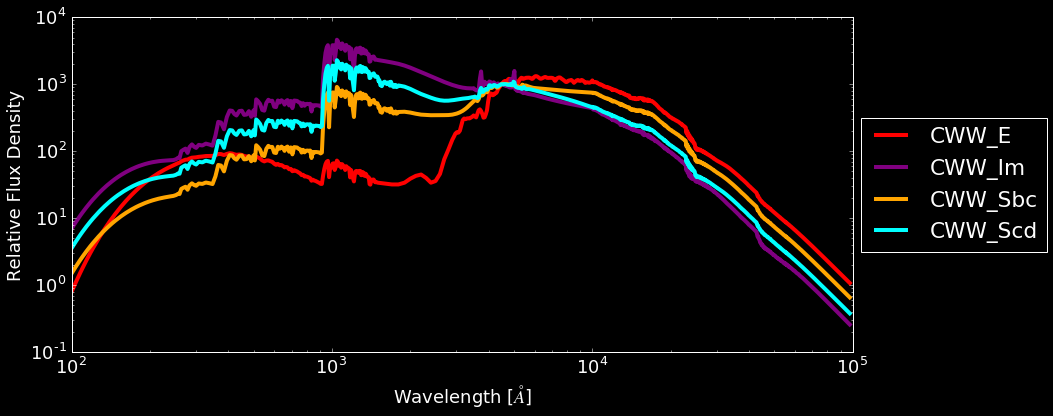

In [4]:
plt.clf()

f, ax = plt.subplots()

cmap_i = 0

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

for filename in os.listdir(SED_dir):
    if filename.endswith(".sed"):
        label = filename[0:-8]
        X,Y = np.genfromtxt(SED_dir+filename, unpack=True)
        ax.plot(X, Y, label=label, lw=4, color=cmap[cmap_i])
        
        cmap_i += 1

rcParams['figure.figsize'] = 14, 6
rcParams.update({'font.size': 18})
ax.set_xlim(100,100000)
ax.set_xlabel("Wavelength [$\AA$]")


ax.set_ylabel("Relative Flux Density")

ax.legend(bbox_to_anchor=(1.01, 0.7), loc=2, borderaxespad=0.)

#plt.grid()
plt.savefig(out_dir+"SEDs.png", bbox_inches="tight")
plt.show()

## Calculate u - g
* u_g = -np.log10(flux_u/ flux_g)
* galaxy flux, galaxy lambda (\AA), filter flux ?, Filter lambda (nm)

## Steps:
* Convert galaxy lambda \AA to nm
* normalize transmittance to 0 to 1
* Interpolate Flux though filter = np.interp(lambda_u, wavlength of galaxy, flux of the galaxy)


## Part 2: SED Colors

In [5]:
def get_transmittance(color):
    '''
    Params:
        color : color abbrev (u,g,r,i,z)
    Output:
        Dictionary with keys:
            color_lambda : wavelength of color
            color_trans : transmittance of color scaled to 0 to 1
    '''
    
    X,Y = np.genfromtxt(Filter_dir+"Sloan_"+color+".txt", unpack=True)
    
    norm_Y = np.flipud(Y)
    norm_Y = norm_Y - min(norm_Y)
    #norm_Y = (Y - min(Y))/(max(Y)-min(Y))
    
    X = np.flipud(X)    
    
    test = {color+"_lambda": X, color+"_trans" : norm_Y}

    return test

def transmittance_dict(colors_array):
    '''
    Params:
        colors_array : array of color abbrev (u,g,r,i,z)
    Output:
        Dictionary of dictionaries, for each color:
            color_lambda : wavelength of color
            color_trans : transmittance of color scaled to 0 to 1 !!
    '''
    
    test = {}
    for color in colors_array:

        test.update(get_transmittance(color))
    
    return test

In [6]:
filters = ("u", "g", "r", "i", "z")
filter_data = transmittance_dict(filters)

print filter_data["z_trans"]

[2.13495900e-03 1.85990300e-03 1.75941600e-03 ... 9.59543158e+01
 9.59062583e+01 9.58687446e+01]


def color(SED, color1, color2):
    '''
    Params:
        SED : input SED file
        color1 : First color
        color2 : Second color
        
    Output:
        prints corrected magnitude of color1 - corrected magnitude of color2
    '''
    
    galaxy_lambda, galaxy_flux = np.genfromtxt(SED_dir+SED, unpack=True)
    
    galaxy_lambda = galaxy_lambda*0.1
    
    flux_filter_1 = np.interp((filter_data[color1+"_lambda"]), galaxy_lambda, galaxy_flux)
    trans_flux_1 = flux_filter_1 * filter_data[color1+"_trans"]
    
    final_flux_1 = np.trapz(trans_flux_1, x=galaxy_lambda)
    
    flux_filter_2 = np.interp((filter_data[color2+"_lambda"]), galaxy_lambda, galaxy_flux)
    trans_flux_2 = flux_filter_2 * filter_data[color2+"_trans"]
    
    final_flux_2 = np.trapz(trans_flux_2, x=galaxy_lambda)
    

    color = -2.5*np.log10(final_flux_1 / final_flux_2)
    
    print("\t %s - %s : %s")%(color1, color2, color)

    ##plt.plot(filter_data[color1+"_lambda"], trans_flux_1, label=color1)
    ##plt.plot(filter_data[color2+"_lambda"], trans_flux_2, label=color2)
    
    ##plt.legend()
    ##plt.show()

for filename in os.listdir(SED_dir):
    if filename.endswith(".sed"):
        print(filename[0:-8])
        
        color(filename, "u", "g")
        color(filename, "g", "r")
        color(filename, "r", "i")
        color(filename, "i", "z")
        

In [7]:
Qe_l = np.array([0.36, 0.37, 0.38, 0.40, 0.45, 0.5, 
        0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 
        0.9, 0.95, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05])*1000.0
QE = np.array([42, 44, 46, 52, 57, 63, 70, 77, 83, 88, 90,
     88, 83, 68, 44, 23, 18, 14, 11, 8, 6])/100.0

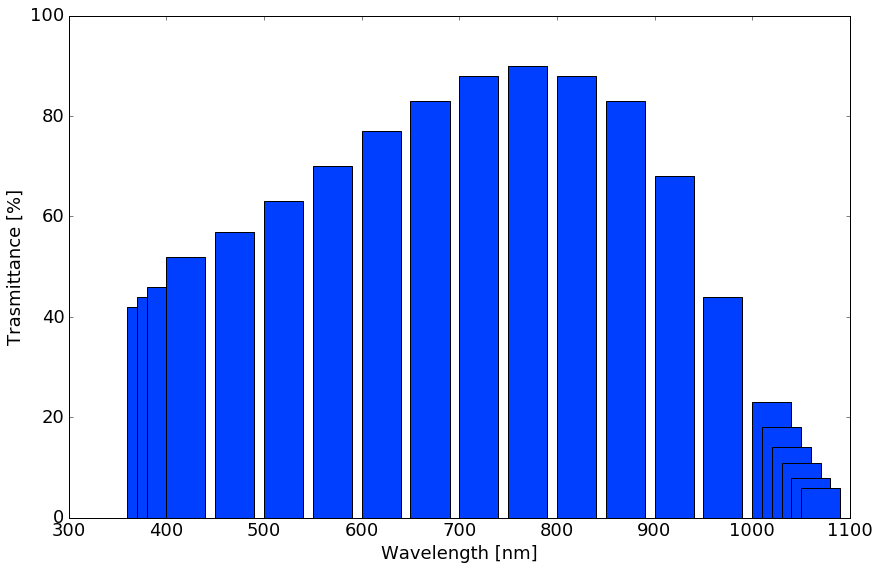

In [11]:
plt.clf()
    
plt.bar(Qe_l, QE*100.0, width=40.0)


rcParams['figure.figsize'] = 14, 9
rcParams.update({'font.size': 18})
        
plt.legend(bbox_to_anchor=(1.01, 0.7), loc=2, borderaxespad=0.)


plt.xlim(300,1100)
plt.xlabel("Wavelength [nm]")

plt.ylim(0, 100)
plt.ylabel("Trasmittance [%]")

#plt.grid()
plt.savefig(out_dir+"filters_uh88.png", bbox_inches="tight")
plt.show()


In [58]:
def color(SED, color1, color2):
    '''
    Params:
        SED : input SED file
        color1 : First color
        color2 : Second color
        
    Output:
        prints corrected magnitude of color1 - corrected magnitude of color2
    '''
    
    galaxy_lambda, galaxy_flux = np.genfromtxt(SED_dir+SED, unpack=True)
    
    galaxy_lambda = galaxy_lambda*0.1
    
    flux_filter_1 = np.interp(galaxy_lambda, (filter_data[color1+"_lambda"]), (filter_data[color1+"_trans"]))
    trans_flux_1 = flux_filter_1 * galaxy_flux
    
    offset = np.interp(galaxy_lambda, Qe_l, QE)
    trans_flux_1 = trans_flux_1*offset
    #trans_flux_1*QE
    #interpolate Q for each wavelength
    
    final_flux_1 = np.trapz(trans_flux_1, x=galaxy_lambda)
    
    flux_filter_2 = np.interp(galaxy_lambda, (filter_data[color2+"_lambda"]), (filter_data[color2+"_trans"]))
    trans_flux_2 = flux_filter_2 * galaxy_flux
    
    trans_flux_1 = trans_flux_2*offset
    
    final_flux_2 = np.trapz(trans_flux_2, x=galaxy_lambda)
    

    color = -2.5*np.log10(final_flux_1 / final_flux_2)
    
    print("\t %s - %s : %s")%(color1, color2, color)

    ##plt.plot(galaxy_lambda, trans_flux_1, label=color1)
    ##plt.plot(galaxy_lambda, trans_flux_2, label=color2)
    
    ##plt.legend()
    ##plt.show()

for filename in os.listdir(SED_dir):
    if filename.endswith(".sed"):
        print(filename[0:-8])
        
        color(filename, "u", "g")
        color(filename, "g", "r")
        color(filename, "r", "i")
        color(filename, "i", "z")
        color(filename, "u", "r")
        

CWW_E
	 u - g : 3.596004219245506
	 g - r : 0.6344100942888308
	 r - i : 0.23379988641180408
	 i - z : 2.211940915376382
	 u - r : 3.694141023812896
CWW_Im
	 u - g : 2.4488398097451
	 g - r : 0.036793198353549314
	 r - i : 0.08637484335148855
	 i - z : 1.8770898817844235
	 u - r : 1.9276986644119118
CWW_Sbc
	 u - g : 2.950003233164872
	 g - r : 0.34329858125501655
	 r - i : 0.21928817498992056
	 i - z : 2.171926142541335
	 u - r : 2.743034916317519
CWW_Scd
	 u - g : 2.779028327503134
	 g - r : 0.2245669057740265
	 r - i : 0.06837225419969717
	 i - z : 1.899309868747097
	 u - r : 2.4512825413055785


## Part 3: Redshift

In [59]:
def r_shift_lambda(lambda_emit, redshift):
    return (1+redshift)*lambda_emit

redshifts = np.arange(0, 1.55, 0.05)

In [60]:
def color(SED, color1, color2, z):
    '''
    Params:
        SED : input SED file
        color1 : First color
        color2 : Second color
        
    Output:
        prints corrected magnitude of color1 - corrected magnitude of color2
    '''
    
    galaxy_lambda, galaxy_flux = np.genfromtxt(SED_dir+SED, unpack=True)
    
    galaxy_lambda = galaxy_lambda*0.1
    
    shift_galaxy_lambda = r_shift_lambda(galaxy_lambda, z)
    
    flux_filter_1 = np.interp(shift_galaxy_lambda, (filter_data[color1+"_lambda"]), (filter_data[color1+"_trans"]))
    trans_flux_1 = flux_filter_1 * galaxy_flux
    
    offset = np.interp(galaxy_lambda, Qe_l, QE)
    trans_flux_1 = trans_flux_1*offset
    
    final_flux_1 = np.trapz(trans_flux_1, x=shift_galaxy_lambda)
    
    flux_filter_2 = np.interp(shift_galaxy_lambda, (filter_data[color2+"_lambda"]), (filter_data[color2+"_trans"]))
    trans_flux_2 = flux_filter_2 * galaxy_flux
    trans_flux_2 = trans_flux_2 * offset
    
    final_flux_2 = np.trapz(trans_flux_2, x=shift_galaxy_lambda)
    

    color = -2.5*np.log10(final_flux_1 / final_flux_2)
    
    return color
    ##print("\t %s - %s : %s")%(color1, color2, color)

'''
def color(SED, color1, color2, z):
    galaxy_lambda, galaxy_flux = np.genfromtxt(SED_dir+SED, unpack=True)
    
    galaxy_lambda = galaxy_lambda*0.1
    
    shift_galaxy_lambda = r_shift_lambda(galaxy_lambda, z)
    
    ##shift_filter_lambda_1 = r_shift_lambda(filter_data[color1+"_lambda"], z)
    
    flux_filter_1 = np.interp((filter_data[color1+"_lambda"]), shift_galaxy_lambda, galaxy_flux)
    trans_flux_1 = flux_filter_1 * filter_data[color1+"_trans"]
    
    final_flux_1 = np.trapz(trans_flux_1, dx=0.5)
    
    ##shift_filter_lambda_2 = r_shift_lambda(filter_data[color2+"_lambda"], z)
    
    flux_filter_2 = np.interp((filter_data[color2+"_lambda"]), shift_galaxy_lambda, galaxy_flux)
    trans_flux_2 = flux_filter_2 * filter_data[color2+"_trans"]
    
    final_flux_2 = np.trapz(trans_flux_2, dx=0.5)
    

    color = -2.5*np.log10(final_flux_1 / final_flux_2)
    
    ##print("\t %s - %s : %s")%(color1, color2, color)
    
    return color
'''

'\ndef color(SED, color1, color2, z):\n    galaxy_lambda, galaxy_flux = np.genfromtxt(SED_dir+SED, unpack=True)\n    \n    galaxy_lambda = galaxy_lambda*0.1\n    \n    shift_galaxy_lambda = r_shift_lambda(galaxy_lambda, z)\n    \n    ##shift_filter_lambda_1 = r_shift_lambda(filter_data[color1+"_lambda"], z)\n    \n    flux_filter_1 = np.interp((filter_data[color1+"_lambda"]), shift_galaxy_lambda, galaxy_flux)\n    trans_flux_1 = flux_filter_1 * filter_data[color1+"_trans"]\n    \n    final_flux_1 = np.trapz(trans_flux_1, dx=0.5)\n    \n    ##shift_filter_lambda_2 = r_shift_lambda(filter_data[color2+"_lambda"], z)\n    \n    flux_filter_2 = np.interp((filter_data[color2+"_lambda"]), shift_galaxy_lambda, galaxy_flux)\n    trans_flux_2 = flux_filter_2 * filter_data[color2+"_trans"]\n    \n    final_flux_2 = np.trapz(trans_flux_2, dx=0.5)\n    \n\n    color = -2.5*np.log10(final_flux_1 / final_flux_2)\n    \n    ##print("\t %s - %s : %s")%(color1, color2, color)\n    \n    return color\n'

CWW_E
CWW_Im
CWW_Sbc
CWW_Scd


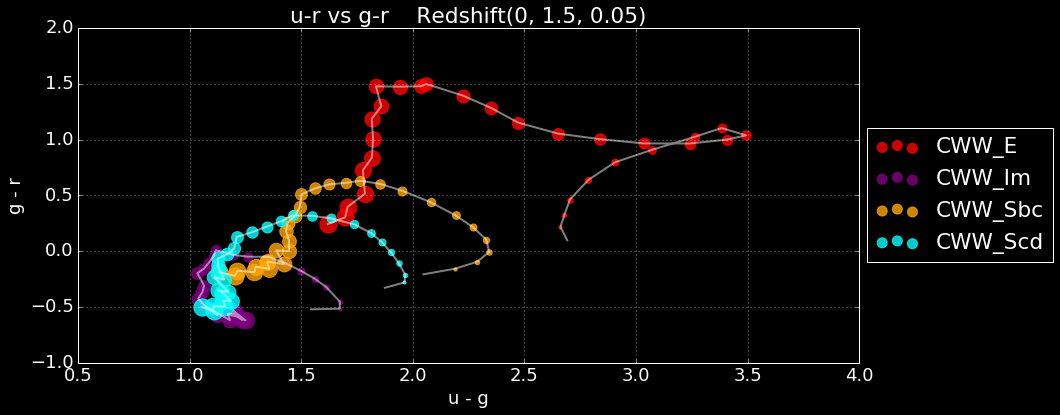

In [16]:
#cmap = cm.rainbow(np.linspace(0, 1, len(os.listdir(SED_dir))))
from mpl_toolkits.mplot3d import Axes3D
plt.ion()

cmap = ["red", "purple", "orange", "cyan"]

fig = plt.figure()
ax = fig.add_subplot(111)#, projection="3d")
    
cmap_i = 0

for filename in os.listdir(SED_dir):
    #plt.clf()
    
    rcParams['figure.figsize'] = 14, 6
    rcParams.update({'font.size': 18})
    
    if filename.endswith(".sed"):
        print(filename[0:-8])
        
        out_u_g = []
        out_g_r = []
        
        for z in range(len(redshifts)):
            ##print("\t \t z = %s")%(z)
            u_g = color(filename, "u", "g", redshifts[z])
            g_r = color(filename, "g", "r", redshifts[z])
            ##r_i = color(filename, "r", "i", redshifts[z])
            ##i_z = color(filename, "i", "z", redshifts[z])
            
            out_u_g.append(u_g)
            out_g_r.append(g_r)
            
            '''
            if redshifts[z] == 0:
                ax.annotate("z = "+str(redshifts[z]), 
                            xy=(u_g, g_r),
                            xytext=(u_g+0.1, g_r-0.4),
                           arrowprops=dict(facecolor="black", shrink=0.01),
                           weight="extra bold")
             
            if redshifts[z] == 1.5:
                ax.annotate("z = "+str(redshifts[z]), 
                            xy=(u_g, g_r),
                            xytext=(u_g-0.2, g_r+1.0),
                           arrowprops=dict(facecolor="black", shrink=0.01),
                           weight="extra bold")   
            '''
            ##ax.scatter(u_g, g_r, c="k", s=400)#, label=str(redshifts[z]))            
            #ax.annotate("z= "+str(redshifts[z]), xy=(u_g, g_r),xytext=(u_g+0.02, g_r-0.01))
            #ax.text(u_g, g_r, str(redshifts[z]), ha="center",
                  # va="center", size=9, weight="extra bold",
                  # color="white")
    
    bid = 0
    for j in range(len(redshifts)):
        if bid == 10:
            #ax.scatter(out_u_g[j], out_g_r[j], redshifts[j], label = filename[0:-8],
            #          color = cmap[cmap_i])
            #'''
            ax.scatter(out_u_g[j], out_g_r[j], s = 200.0*(redshifts[j]),#/(redshifts[j]+0.4),
                    color = cmap[cmap_i],
                    label = filename[0:-8],
                      alpha=0.8)
            #'''
  
        else:
            #ax.scatter(out_u_g[j], out_g_r[j],redshifts[j],
            #          color = cmap[cmap_i])
            #'''
            ax.scatter(out_u_g[j], out_g_r[j], s = 200.0*(redshifts[j]),#/(redshifts[j]+0.4),
                color = cmap[cmap_i],
                      alpha=0.8)
            #'''
           
        bid += 1
    
    ax.plot(out_u_g, out_g_r, lw=2, color='white', alpha=0.5)
    cmap_i += 1
    ##plt.title("Galaxy: "+filename[0:-8]+"    Redshift (0, 1.5, 0.05)")

ax.set_title("u-r vs g-r    Redshift(0, 1.5, 0.05)")
ax.set_xlabel("u - g")
ax.set_ylabel("g - r")
#ax.set_zlabel("Red shift")

plt.legend(bbox_to_anchor=(1.01, 0.7), loc=2, borderaxespad=0.)
plt.grid()

'''
for angle in range(0,360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(0.0001)
'''
plt.savefig(out_dir+"UR_GR_1.png", bbox_inches="tight")
plt.show()

CWW_E
CWW_Im
CWW_Sbc
CWW_Scd


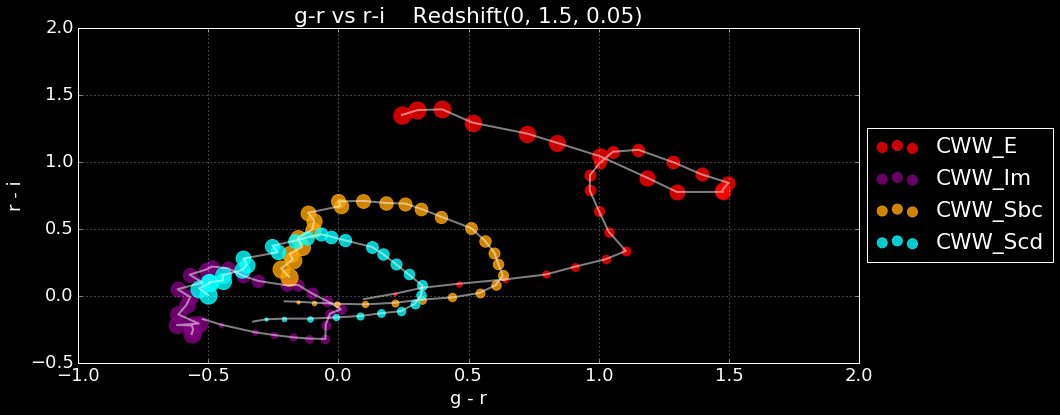

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
    
cmap_i = 0

for filename in os.listdir(SED_dir):
    #plt.clf()
    
    rcParams['figure.figsize'] = 14, 6
    rcParams.update({'font.size': 18})
    
    if filename.endswith(".sed"):
        print(filename[0:-8])
        
        out_g_r = []
        out_r_i = []
        
        for z in range(len(redshifts)):
            ##print("\t \t z = %s")%(z)
            ##u_g = color(filename, "u", "g", redshifts[z])
            g_r = color(filename, "g", "r", redshifts[z])
            r_i = color(filename, "r", "i", redshifts[z])
            ##i_z = color(filename, "i", "z", redshifts[z])
            
            out_g_r.append(g_r)
            out_r_i.append(r_i)
        
            ##ax.scatter(u_g, g_r, c="k", s=400)#, label=str(redshifts[z]))            
            #ax.annotate("z= "+str(redshifts[z]), xy=(u_g, g_r),xytext=(u_g+0.02, g_r-0.01))
            #ax.text(u_g, g_r, str(redshifts[z]), ha="center",
                  # va="center", size=9, weight="extra bold",
                  # color="white")
    
    ax.plot(out_g_r, out_r_i, lw=2, color="white", alpha=0.5)

    bid = 0
    for j in range(len(redshifts)):
        if bid == 10:
            ax.scatter(out_g_r[j], out_r_i[j], s = 200.0*redshifts[j],#/(redshifts[j]+0.4),
                    color = cmap[cmap_i],
                    label = filename[0:-8],
                      alpha=0.8)
        else:
            ax.scatter(out_g_r[j], out_r_i[j], s = 200.0*redshifts[j],#/(redshifts[j]+0.4),
                color = cmap[cmap_i],
                      alpha=0.8)
           
        bid += 1
    

    cmap_i += 1
    ##plt.title("Galaxy: "+filename[0:-8]+"    Redshift (0, 1.5, 0.05)")

ax.set_title("g-r vs r-i    Redshift(0, 1.5, 0.05)")
    
#ax.set_xlim(0.5, 3.2)
ax.set_xlabel("g - r")
ax.set_ylabel("r - i")


plt.legend(bbox_to_anchor=(1.01, 0.7), loc=2, borderaxespad=0.)
plt.grid()

plt.savefig(out_dir+"GR_RI_1.png", bbox_inches="tight")
plt.show()

E
Im
Sbc
Scd


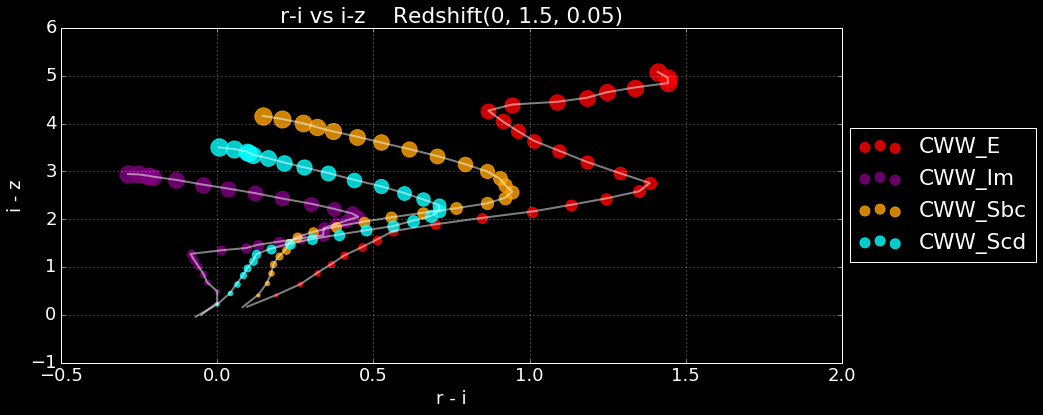

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
    
cmap_i = 0

models = {}

df = pd.DataFrame([])

for filename in os.listdir(SED_dir):
    #plt.clf()
    
    rcParams['figure.figsize'] = 14, 6
    rcParams.update({'font.size': 18})
    
    if filename.endswith(".sed"):
        print(filename[4:-8])
        
        out_i_z = []
        out_r_i = []
        
        for z in range(len(redshifts)):
            ##print("\t \t z = %s")%(z)
            ##u_g = color(filename, "u", "g", redshifts[z])
            ##g_r = color(filename, "g", "r", redshifts[z])
            r_i = color(filename, "r", "i", redshifts[z])
            i_z = color(filename, "i", "z", redshifts[z])
            
            out_i_z.append(i_z)
            out_r_i.append(r_i)
            
            '''
            if redshifts[z] == 0:
                ax.annotate("z = "+str(redshifts[z]), 
                            xy=(u_g, g_r),
                            xytext=(u_g+0.1, g_r-0.4),
                           arrowprops=dict(facecolor="black", shrink=0.01),
                           weight="extra bold")
             
            if redshifts[z] == 1.5:
                ax.annotate("z = "+str(redshifts[z]), 
                            xy=(u_g, g_r),
                            xytext=(u_g-0.2, g_r+1.0),
                           arrowprops=dict(facecolor="black", shrink=0.01),
                           weight="extra bold")   
            '''
            ##ax.scatter(u_g, g_r, c="k", s=400)#, label=str(redshifts[z]))            
            #ax.annotate("z= "+str(redshifts[z]), xy=(u_g, g_r),xytext=(u_g+0.02, g_r-0.01))
            #ax.text(u_g, g_r, str(redshifts[z]), ha="center",
                  # va="center", size=9, weight="extra bold",
                  # color="white")
    ax.plot(out_r_i, out_i_z, lw=2, color="white", alpha=0.5)
    
    bid = 0
    for j in range(len(redshifts)):
        if bid == 10:
            ax.scatter(out_r_i[j], out_i_z[j], s = 200.0*redshifts[j],#/(redshifts[j]+0.4),
                    color = cmap[cmap_i],
                    label = filename[0:-8],
                      alpha=0.8)
        else:
            ax.scatter(out_r_i[j], out_i_z[j], s = 200.0*redshifts[j],#/(redshifts[j]+0.4),
                color = cmap[cmap_i],
                      alpha=0.8)
           
        bid += 1

    #print(out_i_z)
    #print(out_r_i)
    models.update({filename[4:-8]+"_ri" : out_r_i, 
                   filename[4:-8]+"_iz" : out_i_z})
    
    cmap_i += 1
    ##plt.title("Galaxy: "+filename[0:-8]+"    Redshift (0, 1.5, 0.05)")

ax.set_title("r-i vs i-z    Redshift(0, 1.5, 0.05)")
    
#ax.set_xlim(0.5, 3.2)
ax.set_xlabel("r - i")
ax.set_ylabel("i - z")


plt.legend(bbox_to_anchor=(1.01, 0.7), loc=2, borderaxespad=0.)
plt.grid()

plt.savefig(out_dir+"RI_IZ_1.png", bbox_inches="tight")
plt.show()

In [62]:
df = pd.DataFrame(models)
df.to_csv("/Volumes/LaCie/School/SEDs.csv")

cmap = cm.rainbow(np.linspace(0, 1, len(os.listdir(SED_dir))))

fig = plt.figure()
ax = fig.add_subplot(111)
    
cmap_i = 0

def color(SED, color1, color2, z):
    '''
    Params:
        SED : input SED file
        color1 : First color
        color2 : Second color
        
    Output:
        prints corrected magnitude of color1 - corrected magnitude of color2
    '''
    
    galaxy_lambda, galaxy_flux = np.genfromtxt(SED_dir+SED, unpack=True)
    
    galaxy_lambda = galaxy_lambda*0.1
    
    shift_galaxy_lambda = r_shift_lambda(galaxy_lambda, z)
    
    ##shift_filter_lambda_1 = r_shift_lambda(filter_data[color1+"_lambda"], z)
    
    flux_filter_1 = np.interp((filter_data[color1+"_lambda"]), shift_galaxy_lambda, galaxy_flux)
    trans_flux_1 = flux_filter_1 * filter_data[color1+"_trans"]
    
    final_flux_1 = np.trapz(trans_flux_1, dx=0.5)
    
    ##shift_filter_lambda_2 = r_shift_lambda(filter_data[color2+"_lambda"], z)
    
    flux_filter_2 = np.interp((filter_data[color2+"_lambda"]), shift_galaxy_lambda, galaxy_flux)
    trans_flux_2 = flux_filter_2 * filter_data[color2+"_trans"]
    
    final_flux_2 = np.trapz(trans_flux_2, dx=0.5)
    

    color = -2.5*np.log10(final_flux_1 / final_flux_2)
    
    ##print("\t %s - %s : %s")%(color1, color2, color)
    
    return color

    ##plt.plot(filter_data[color1+"_lambda"], trans_flux_1, label=color1)
    ##plt.plot(filter_data[color2+"_lambda"], trans_flux_2, label=color2)
    
    ##plt.legend()
    ##plt.show()
    
def color_color(filename, filter1, filter2, filter3):
    global cmap
    global redshifts
    
    cc1 = filter1+"-"+filter2
    
    cc2 = filter2+"-"+filter3
    
    color1 = []
    color2 = []
    
    [color1.append(color(filename, filter1, filter2, redshifts[z])) for z in range(len(redshifts))]
    [color2.append(color(filename, filter2, filter3, redshifts[z])) for z in range(len(redshifts))]
    
    bid = 0
    
    for j in range(len(redshifts)):
        if bid == 10:
            ax.scatter(color1[j], color2[j], s = 200.0/(redshifts[j]+0.4),
                    color = cmap[cmap_i],
                    label = filename[0:-8],
                      alpha=0.8)
        else:
            ax.scatter(color1[j], color2[j], s = 200.0/(redshifts[j]+0.4),
                    color = cmap[cmap_i],
                    label = filename[0:-8],
                      alpha=0.8)
        bid += 1
    
    cmap += 1
    
    ax.set_title(cc1+" vs. "+cc2+"    z = [0,1.5,0.05]")
    #ax.set_title("U-R vs G-R    Redshift(0, 1.5, 0.05)")
    
    ax.set_xlabel(cc1)
    ax.set_ylabel(cc2)

    plt.legend(bbox_to_anchor=(1.01, 0.7), loc=2, borderaxespad=0.)
    plt.grid()

    plt.savefig(out_dir+cc1+"_"+cc2+".png", bbox_inches="tight")
    plt.show()

for filename in os.listdir(SED_dir):
    plt.clf()
    
    rcParams['figure.figsize'] = 14, 5
    rcParams.update({'font.size': 14})
    
    if filename.endswith(".sed"):
        print(filename[0:-8])
        
        color_color(filename, "u", "g", "r")
        color_color(filename, "g", "r", "i")
        color_color(filename, "r", "i", "z")
        

CWW_E
CWW_Im
CWW_Sbc
CWW_Scd


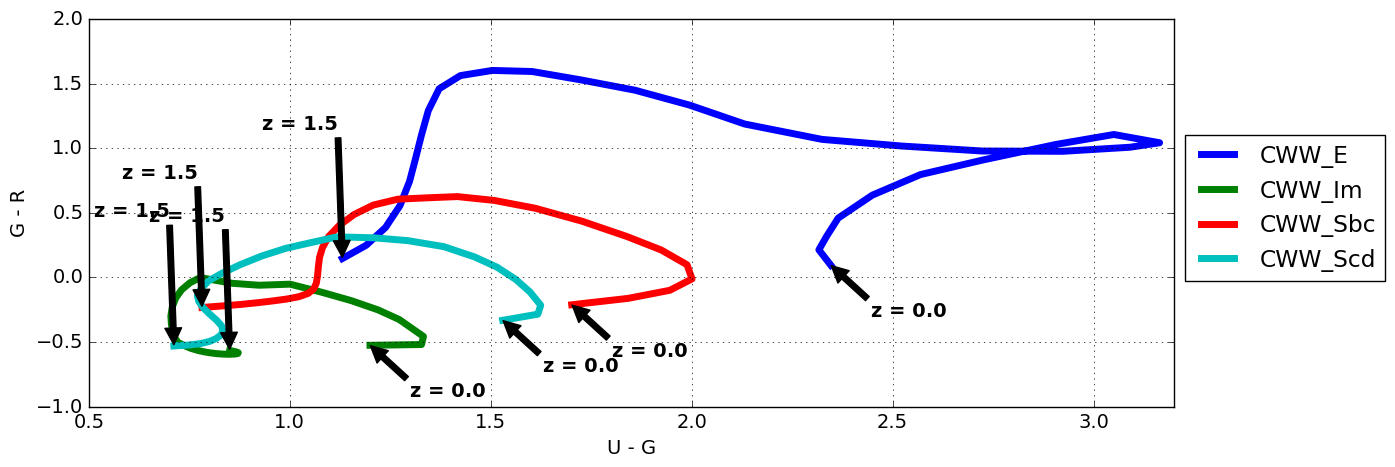

In [312]:
def color(SED, color1, color2, z):
    '''
    Params:
        SED : input SED file
        color1 : First color
        color2 : Second color
        
    Output:
        prints corrected magnitude of color1 - corrected magnitude of color2
    '''
    
    galaxy_lambda, galaxy_flux = np.genfromtxt(SED_dir+SED, unpack=True)
    
    galaxy_lambda = galaxy_lambda*0.1
    
    shift_galaxy_lambda = r_shift_lambda(galaxy_lambda, z)
    
    ##shift_filter_lambda_1 = r_shift_lambda(filter_data[color1+"_lambda"], z)
    
    flux_filter_1 = np.interp((filter_data[color1+"_lambda"]), shift_galaxy_lambda, galaxy_flux)
    trans_flux_1 = flux_filter_1 * filter_data[color1+"_trans"]
    
    final_flux_1 = np.trapz(trans_flux_1, dx=0.5)
    
    ##shift_filter_lambda_2 = r_shift_lambda(filter_data[color2+"_lambda"], z)
    
    flux_filter_2 = np.interp((filter_data[color2+"_lambda"]), shift_galaxy_lambda, galaxy_flux)
    trans_flux_2 = flux_filter_2 * filter_data[color2+"_trans"]
    
    final_flux_2 = np.trapz(trans_flux_2, dx=0.5)
    

    color = -2.5*np.log10(final_flux_1 / final_flux_2)
    
    ##print("\t %s - %s : %s")%(color1, color2, color)
    
    return color

    ##plt.plot(filter_data[color1+"_lambda"], trans_flux_1, label=color1)
    ##plt.plot(filter_data[color2+"_lambda"], trans_flux_2, label=color2)
    
    ##plt.legend()
    ##plt.show()

cmap = cm.rainbow(np.linspace(0, 1, len(os.listdir(SED_dir))))

fig = plt.figure()
ax = fig.add_subplot(111)
    
for filename in os.listdir(SED_dir):
    #plt.clf()
    
    rcParams['figure.figsize'] = 14, 5
    rcParams.update({'font.size': 14})
    
    if filename.endswith(".sed"):
        print(filename[0:-8])
        
        out_u_g = []
        out_g_r = []
        
        for z in range(len(redshifts)):
            ##print("\t \t z = %s")%(z)
            u_g = color(filename, "u", "g", redshifts[z])
            g_r = color(filename, "g", "r", redshifts[z])
            r_i = color(filename, "r", "i", redshifts[z])
            i_z = color(filename, "i", "z", redshifts[z])
            
            out_u_g.append(u_g)
            out_g_r.append(g_r)
            
            if redshifts[z] == 0:
                ax.annotate("z = "+str(redshifts[z]), 
                            xy=(u_g, g_r),
                            xytext=(u_g+0.1, g_r-0.4),
                           arrowprops=dict(facecolor="black", shrink=0.01),
                           weight="extra bold")
             
            if redshifts[z] == 1.5:
                ax.annotate("z = "+str(redshifts[z]), 
                            xy=(u_g, g_r),
                            xytext=(u_g-0.2, g_r+1.0),
                           arrowprops=dict(facecolor="black", shrink=0.01),
                           weight="extra bold")   
            
            ##ax.scatter(u_g, g_r, c="k", s=400)#, label=str(redshifts[z]))            
            #ax.annotate("z= "+str(redshifts[z]), xy=(u_g, g_r),xytext=(u_g+0.02, g_r-0.01))
            ##ax.text(u_g, g_r, str(redshifts[z]), ha="center",
                   # va="center", size=9, weight="extra bold",
                   #color="white")
    plt.plot(out_u_g, out_g_r, label=filename[0:-8], lw=5)
    ##plt.title("Galaxy: "+filename[0:-8]+"    Redshift (0, 1.5, 0.05)")

plt.xlim(0.5, 3.2)
plt.xlabel("U - G")
plt.ylabel("G - R")
plt.legend(bbox_to_anchor=(1.01, 0.7), loc=2, borderaxespad=0.)
plt.grid()
plt.show()
            
        